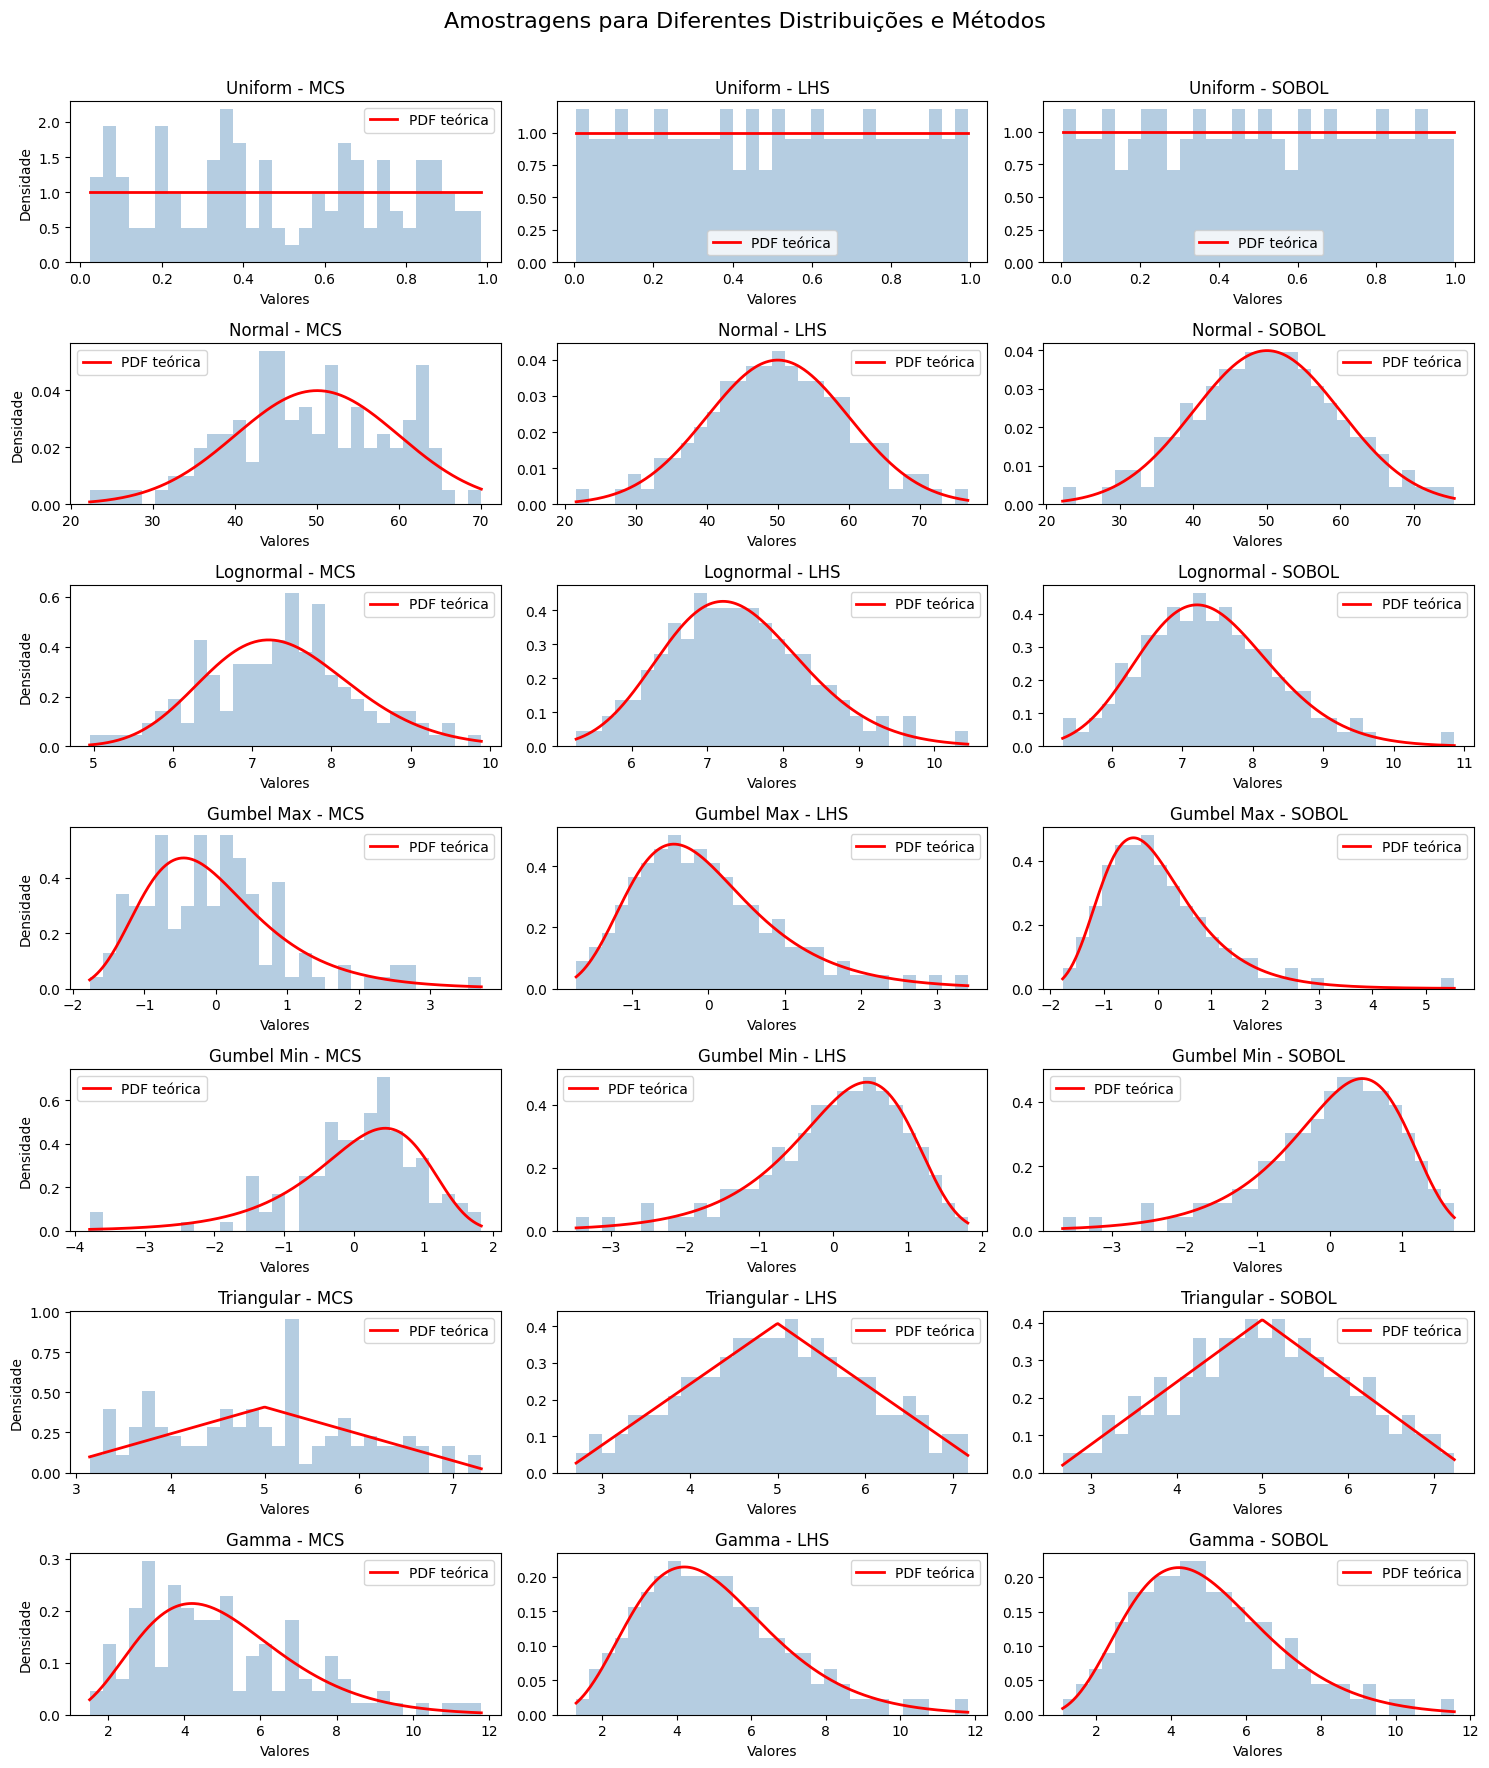

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from distributions import random_sampling, convert_params_to_scipy

# Lista de distribuições com parâmetros fornecidos como média e desvio padrão
distributions = [
    ('uniform', {'mean': 0.5, 'std': np.sqrt(1/12)}),
    ('normal', {'mean': 50, 'std': 10}),
    ('lognormal', {'mean': np.exp(2), 'std': 0.954}),
    ('gumbel max', {'mean': 0, 'std': 1}),
    ('gumbel min', {'mean': 0, 'std': 1}),
    ('triangular', {'mean': 5, 'std': 1}),
    ('gamma', {'mean': 5, 'std': 2}),
]

methods = ['mcs', 'lhs', 'sobol']
n_samples = 128  # Para Sobol: m = 7 → 2**7 = 128

fig, axs = plt.subplots(len(distributions), len(methods), figsize=(15, 18))
fig.suptitle('Amostragens para Diferentes Distribuições e Métodos', fontsize=16)

for i, (dist_name, user_params) in enumerate(distributions):
    for j, method in enumerate(methods):
        if method == 'sobol':
            samples = random_sampling(dist_name, user_params, method, 7) 
        else:
            samples = random_sampling(dist_name, user_params, method, n_samples)

        scipy_params = convert_params_to_scipy(dist_name, user_params)

        # Plotagem
        ax = axs[i, j]
        ax.hist(samples, density=True, bins=30, histtype='stepfilled', alpha=0.4, color='steelblue')

        # Curva da PDF teórica
        x_vals = np.linspace(min(samples), max(samples), 300)
        dist_name_lower = dist_name.lower()

        if dist_name_lower == 'uniform':
            pdf_vals = stats.uniform.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'normal':
            pdf_vals = stats.norm.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'lognormal':
            pdf_vals = stats.lognorm.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'gumbel max':
            pdf_vals = stats.gumbel_r.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'gumbel min':
            pdf_vals = stats.gumbel_l.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'triangular':
            pdf_vals = stats.triang.pdf(x_vals, **scipy_params)
        elif dist_name_lower == 'gamma':
            pdf_vals = stats.gamma.pdf(x_vals, **scipy_params)
        else:
            pdf_vals = None

        if pdf_vals is not None:
            ax.plot(x_vals, pdf_vals, 'r-', lw=2, label='PDF teórica')
            ax.legend()

        ax.set_title(f'{dist_name.title()} - {method.upper()}')
        ax.set_xlabel('Valores')
        if j == 0:
            ax.set_ylabel('Densidade')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


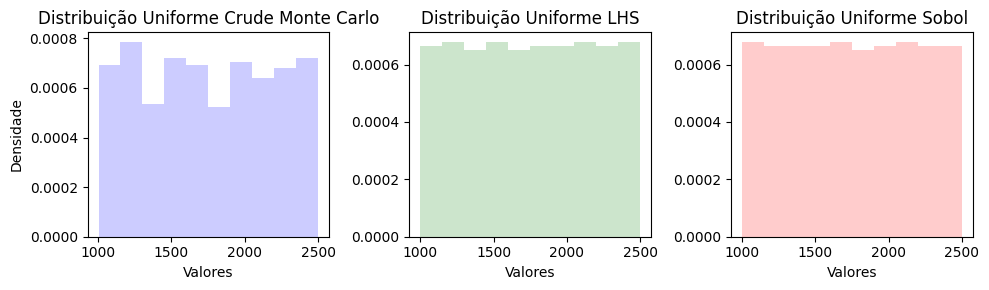

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

params = {'loc': 1000, 'scale': 1500}
x = random_sampling('uniform', params, 'mcs', 512)
y = random_sampling('uniform', params, 'lhs', 512)
z = random_sampling('uniform', params, 'sobol', 9)

# Cria uma figura com 3 subplots (1 linha, 3 colunas)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 3))  # figsize ajusta o tamanho

# Plot 1: Histograma da primeira distribuição
ax1.hist(x, density=True, bins='auto', histtype='stepfilled', alpha=0.2, color='blue')
ax1.set_title('Distribuição Uniforme Crude Monte Carlo')
ax1.set_xlabel('Valores')
ax1.set_ylabel('Densidade')

# Plot 2: Histograma da segunda distribuição
ax2.hist(y, density=True, bins='auto', histtype='stepfilled', alpha=0.2, color='green')
ax2.set_title('Distribuição Uniforme LHS')
ax2.set_xlabel('Valores')

# Plot 3: Histograma da terceira distribuição
ax3.hist(z, density=True, bins='auto', histtype='stepfilled', alpha=0.2, color='red')
ax3.set_title('Distribuição Uniforme Sobol')
ax3.set_xlabel('Valores')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

Parâmetros para scipy.stats: {'c': 0.5, 'loc': np.float64(2.550510257216822), 'scale': np.float64(4.898979485566356)}


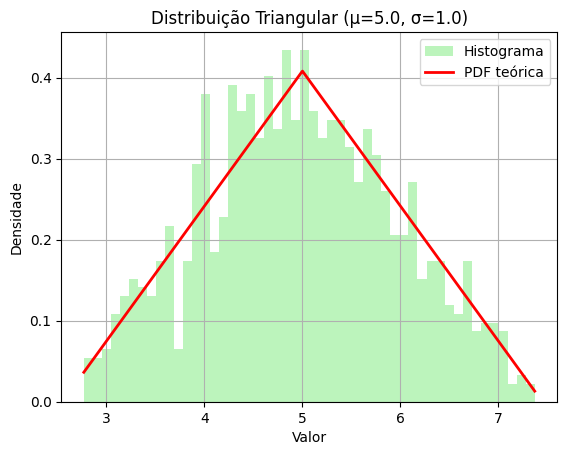

In [ ]:
from distributions import convert_params_to_scipy

user_params = {'mean': 5.0, 'std': 1.0}
dist_name = 'triangular'

scipy_params = convert_params_to_scipy(dist_name, user_params)
print("Parâmetros para scipy.stats:", scipy_params)

samples = stats.triang.rvs(
    c=scipy_params['c'],
    loc=scipy_params['loc'],
    scale=scipy_params['scale'],
    size=1000
)

# Visualização
plt.hist(samples, bins=50, density=True, alpha=0.6, color='lightgreen', label='Histograma')

# Curva da densidade teórica
x = np.linspace(min(samples), max(samples), 500)
pdf = stats.triang.pdf(x, c=scipy_params['c'], loc=scipy_params['loc'], scale=scipy_params['scale'])
plt.plot(x, pdf, 'r-', lw=2, label='PDF teórica')

plt.title(f'Distribuição Triangular (μ={user_params["mean"]}, σ={user_params["std"]})')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.show()